In [6]:
#Setup
import pandas as pd
pd.set_option('display.max_rows', None)

trash = pd.read_csv("data/smart_trash_data.csv", sep=",")
population = pd.read_csv("data/population.csv", sep=",")

### Submetric 1: Cleanliness Innovations
Walking down the streets of South Oakland, there is one thing that you will notice: trash. <br>
You will see trash 
- on the side of the street
- coming out of trash cans
- on people's front yards<br>

__it's everywhere!__


Fortunately, Pittsburgh is trying to decrease the amount of litter throughout the streets by installing smart trash containers. Smart trash containers are trash bins that contain sensors that will report when a bin is full and needs to be emptied. We will look at how many there are in the city, how many there are in each neighborhood, and the percentage of the smart containers that each neighborhood contains. We will then see the neighborhoods that have the most smart trash cans per person who lives there.



In [8]:
# Total number of smart containers
total_count = trash.shape[0]
print(f"There are {total_count} smart containers")

There are 1194 smart containers


The 10 neighborhoods with the most smart trash containers are

In [28]:
neighborhood_counts = trash.groupby('neighborhood').size().reset_index(name='count')
neighborhood_counts.sort_values(by='count', ascending=False).head(10)

,neighborhood,count
57,Shadyside,76
25,East Liberty,68
66,Squirrel Hill South,63
8,Bloomfield,58
48,North Shore,53
61,South Side Flats,51
69,Strip District,42
13,Carrick,38
17,Central Oakland,34
40,Lower Lawrenceville,29


Here are the top 10 neighborhoods by percentage of the trash containers

In [12]:
neighborhood_counts['percentage'] = round((neighborhood_counts['count'] / total_count), 4) * 100
neighborhood_counts.sort_values(by='count', ascending=False).head(10)

,neighborhood,count,percentage
57,Shadyside,76,6.37
25,East Liberty,68,5.70
66,Squirrel Hill South,63,5.28
8,Bloomfield,58,4.86
48,North Shore,53,4.44
61,South Side Flats,51,4.27
69,Strip District,42,3.52
13,Carrick,38,3.18
17,Central Oakland,34,2.85
40,Lower Lawrenceville,29,2.43


In [26]:
neighborhood_counts.sort_values(by='count').head(10)

,neighborhood,count,percentage
78,Windgap,1,0.08
23,East Carnegie,1,0.08
70,Swisshelm Park,1,0.08
5,Bedford Dwellings,1,0.08
67,St. Clair,1,0.08
46,Mt. Oliver,1,0.08
49,Northview Heights,1,0.08
60,South Shore,1,0.08
50,Oakwood,1,0.08
4,Banksville,2,0.17


In [14]:
merged = pd.merge(neighborhood_counts, population, left_on='neighborhood', right_on='Neighborhood', how='inner')

merged['people per container'] = merged['2020_Total_Population']/merged['count']
merged.sort_values(by='people per container')
merged[['neighborhood','count','2020_Total_Population','people per container']].sort_values(by='people per container').head(10)

,neighborhood,count,2020_Total_Population,people per container
16,Chateau,5,19,3.800000
46,North Shore,53,301,5.679245
72,West End,9,205,22.777778
58,South Shore,1,29,29.000000
1,Allegheny West,15,540,36.000000
66,Strip District,42,1845,43.928571
41,Middle Hill,29,1757,60.586207
20,East Allegheny,26,1903,73.192308
35,Larimer,20,1545,77.250000
32,Homewood South,28,2260,80.714286


We can see that Shadyside has 76 containers, which is 6.37% of the overall smart containers installed. We also see that within the top 10, neighborhoods contain anywhere between about 2.5% of the trashcans to around 6.4%. We can also see that the 9 least included neighborhoods only received 1 trashcan each, which is less than .01% of the total number installed. We can see that some neighborhoods have more trash cans per person, meaning that a place like the Strip District or North Shore would be the best option

We will now visualize the data. Using a bar graph, we can see that Shadyside and East Liberty have the most amount of smart trash cans, and the amount per neighborhood decreases at a linear rate.

Text(0.5, 1.0, 'Count of trashcans')

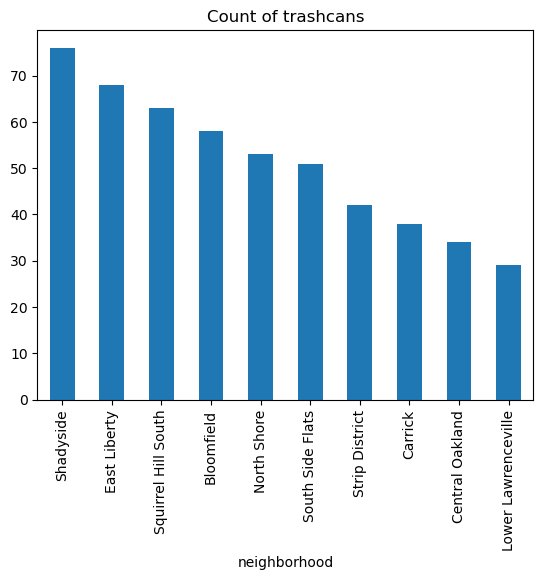

In [38]:
import matplotlib.pyplot as plt
plotted = neighborhood_counts.sort_values(by='count', ascending=False).head(10)

plotted.plot(kind='bar', x='neighborhood', y='count', legend=False)
plt.title("Count of trashcans")

### Submetric 1 Conclusion

We can conclude that of the almost 1200 smart containers installed by Pittsburgh, they are not evenly distributed throughout the city. Shadyside, East Liberty, and Squirrel Hill received the most amount of trash cans, so hopefully they will have the least amount of litter in teh future. However, we can see that the North Shore and West End are two of the neighborhoods with the a population greater than 100 with the most trash cans per person.